# Exercise Sheet 4

## Implementing regression

### Deadline: 08.12.2020 23:59

**Instructions:**
Insert your code in the *TODO* sections ans type your answers in the *Answer* cells. <br>
Submit as a notebook together with the extra files (mentioned in later in the exercise) in an archive.

-Bernadeta Griciūtė (7007672) \
-Sangeet Sagar (7009050

{begr00001,sasa00001\}@stud.uni-saarland.de}

In this exercise we will implement a regression by hand instead of using sklearn package. <br>
We will use the same titanic dataset as last time, so first we have to load it.

In [9]:
import pandas as pd
## TODO: load the dataset into a pandas dataframe

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Age,Price
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,26.5500
4,5,0,3,35.0,8.0500


Fitting a regression means finding a line such that the mean distance from the actual datapoints and their projections onto the line (predictions), i.e. the error, is minimal. We achive that by defining the loss function (MSE in case of linear regression) and minimizing it, or in other words, finding the minimum point. <br>

In this exercise we will fit a linear regression with one predictor (age of the passenger) without intercept, so that our loss function is dependent only on the coefficient (aka weight) *w*, so that the loss function is defined as *MSE(w)*. 

### 4.1 Prepare data (0.5 points)
As we are fitting a model without the intercept, we need to center the data.

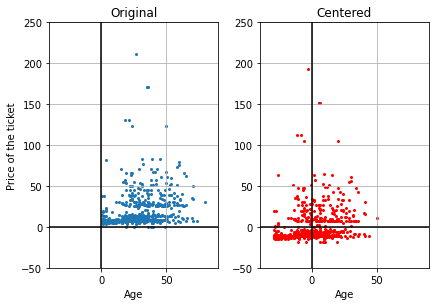

In [10]:
import matplotlib.pyplot as plt
import numpy as np

## TODO: center the input data and save under x (age of the passenger) and y (price of the ticket) variables

x = titanic[["Age"]] - np.mean(titanic[["Age"]])
y = titanic[["Price"]] - np.mean(titanic[["Price"]])


## Uncomment this part for plotting

fig, axs = plt.subplots(1, 2)
fig.tight_layout()

axs[0].scatter(titanic.Age, titanic.Price, s=4)
axs[0].set_title('Original')
axs[0].set_ylabel('Price of the ticket')

axs[1].scatter(x, y, color = 'r', s=4)
axs[1].set_title('Centered')

for ax in axs:
    ax.set_xlim(-40, 90)
    ax.set_ylim(-50, 250)
    ax.set_xlabel('Age')
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

plt.show()

### 4.2 Define the loss function (0.5 points)

Write the formula for calculating the loss function *MSE(w)* with $\textbf{X}^{n*m}$ as a matrix with input data, *n* - the number of datapoints, *m* - the number of features, $\textbf{y}^{n}$ - vector containing ground truth values. 

*Answer*: <br>

$$
MSE(w) = \sum_1^N\|\textbf{y}^n −\textbf{X}^{n\times m}w^T\|^2 
$$
Where: <br>
$w$: vector of size $1 \times m$

### 4.3 Create a computational graph for the loss function (2 points)

In this part you will create a computational graph for the loss funciton defined above. Please, have a look at this <a href='https://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/'>tutorial</a> to understand what a computational graph is.

We will use an application for creating diagrams <a href="https://app.diagrams.net/">draw.io</a> for creating the graph. In the exercise materials there is a file *ComputationalGraphs_Instructions*. Go to the <a href="https://app.diagrams.net/">application</a> and open this file. Follow the instructions in the file.

Save your graph under *computational_graph.png* in the same folder as this notebook and execute the next cell to print it. You can change the *width* parameter to adjust to your image.

Don't forget to add the file to the archive together with this notebook!

<img src="computational_graph.png" width=400>

### 4.4 Plot the loss function (2 points)

In this part you will use the computational graph for calculating the loss function and plotting it.

w: (100, 1) 
x: (714, 1) 
y: (714, 1)
mse: (100, 1)


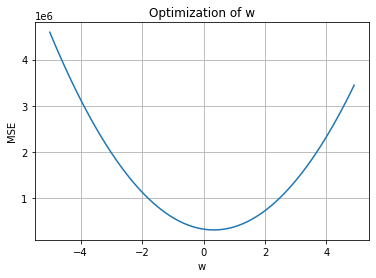

In [174]:
import numpy as np
## TODO: define the input values
##     w: an array of possible values of w for plotting, from -5 to 5 with a step of 0.1
##     x: centered input values (age of the passengers)
##     y: centered output values (price of the ticket)
##     n: number of data points
x = titanic[["Age"]] - np.mean(titanic[["Age"]])
y = titanic[["Price"]] - np.mean(titanic[["Price"]])

w = np.arange(-5,5, 0.1)
x = x.to_numpy()
y = y.to_numpy()
n = x.shape[0]

## Reshape the data according to how you defined dimensions in the computational graph using .reshape() method

w = w.reshape(len(w),1)
x = x.reshape(n,1)
y = y.reshape(n,1)
# n # scalar value can not be rehaped

## Uncomment for printing
print('w:', str(w.shape),
      '\nx:', str(x.shape),
      '\ny:', str(y.shape))
      
    
## TODO: compute the intermediate nodes and the output node of the graph.
##       Be consistent with the names of the variables.    
B = np.dot(x, w.T)
C = y - B
D = C**2
E = np.ones(n).reshape(1, n)
F = np.dot(E, D)

## TODO: reshape w and mse for plotting: they should have shape (100,)
mse = F.reshape(len(w),1)
w = w.reshape(len(w),1)
print('mse:', str(mse.shape))

# ## Uncomment for plotting
plt.plot(w, mse)
plt.xlabel('w')
plt.ylabel('MSE')
plt.title('Optimization of w')
plt.grid(True)
plt.show()


### 4.5 Find the minimum point of the loss function

We can find the minimum point of the function, which is the optimal weight, using its first derivative. <br>
Go through <a href='https://www.khanacademy.org/math/old-differential-calculus/product-quotient-chain-rules-dc'> this tutorial </a> on Khan Academy for refreshment of calculating the derivative.

#### 4.5.1 Get the formula to calculate the optimal weight (2 points)

Insert intermediate steps (you can find them on pages 106-107 of Deep Learning book, chapter 5 Machine Learning) and explain the transitions from one step to another.

*Answer*: <br>
1. $\nabla_w MSE = \nabla_w \frac{1}{n}||\hat{y} - y||_2^2$ = 0

<font color='blue'>
    
We know that $\hat{y}$ represent the predictions of the model on the test set and is equal to $X^{train}w$
$$ \frac{1}{n}\nabla_w \|X^{train}w -\textbf{y}^{train}\|_2^2 = 0 $$

Expanding the above equation we get-
$$ \nabla_w (X^{train}w -\textbf{y}^{train})^T*(X^{train}w -\textbf{y}^{train}) = 0 $$

$$ \nabla_w ((X^{train}w)^T -(\textbf{y}^{train})^T)*(X^{train}w -\textbf{y}^{train}) = 0 $$

Use the property-  $(AB)^T = B^TA^T$ and multiply both terms
$$ \nabla_w ((w^TX^{train^T} -\textbf{y}^{train^T})*(X^{train}w -\textbf{y}^{train}) = 0 $$

$$ \nabla_w (w^TX^{train^T}X^{train}w - w^TX^{train^T}y^{train}-\textbf{y}^{train^T}X^{train}w + y^{train^T}y^{train}) = 0 $$

Focus on the third term- again use: $(AB)^T = B^TA^T$
$$ (w^TX^{train^T}X^{train}w - w^TX^{train^T}y^{train}-(X^{train}w)^T{y}^{train^T} + y^{train^T}y^{train}) = 0 $$

$$ (w^TX^{train^T}X^{train}w - w^TX^{train^T}y^{train}-X^{train^T}w^T{y}^{train^T} + y^{train^T}y^{train}) = 0 $$

Now we can add second and third term-
$$ (w^TX^{train^T}X^{train}w - 2w^TX^{train^T}y^{train} + y^{train^T}y^{train}) = 0 $$

$$ \implies 2X^{train^T}X^{train}w - 2X^{train^T}y^{train} = 0 $$
$$ \implies w =(X^{train^T}X^{train})^{-1}X^{train^T}y^{train} = 0 $$
    
 </font>
 6. $w = (X^T X)^{-1} X^T y$



#### 4.5.2 Compute the optimal **w** (0.5 points)
1. from formula 6;
2. using sklearn: fit a regression (without the intercept!) and get the value of **w** to check your solution.

In [166]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv # for calculating the inverse

## TODO: compute the optimal w using formula 6 from the exercise above

a = np.dot(x.T, x)
b = np.linalg.inv(a)
c = np.dot(x.T, y)
optimal_w = np.dot(b, c)[0][0] ## this shold be a float number


## TODO: fit a regression without the intercept and get the value of the coefficient (call using .coef_)
lr = LinearRegression()
X = titanic["Age"].to_numpy().reshape(-1, 1) # Training data
y_true = titanic["Price"].to_numpy().reshape(-1, 1) # Target values
lr.fit(X, y_true)
sk_model_coef = lr.coef_[0][0]    ## this shold be a float number

## Uncomment for printing
print('Optimal weight we computed:', '\t\t', str(optimal_w), '\n'
     'Model coefficient from sklearn:', '\t', str(sk_model_coef))

Optimal weight we computed: 		 0.33511180736566953 
Model coefficient from sklearn: 	 0.3351118073656695


### 4.6 Maxima, minima, saddle points (1 point)

How do we define if a critical point is maximum, minimum or saddle in two-dimensional space? And in multi-dimensional?

*Answer*:
<font color='blue'>
    
#### In two-dimensional space:
 
To define a type of a critical point, we need to use a **second partial derivative** test. 
Suppose that (a,b) is a critical point of f(x,y) and that the second order partial derivatives are continuous in some region that contains (a,b).
 
Define determinant:
$$D(a,b)=f_{​​​xx}​​​(a,b)f_{​​​yy}​​​(a,b)-[f_{​​​xy}​​​(a,b)]^{​​​2}​​​$$
 
1. If D>0 and $f_{​​​xx}​​​(a,b)>0$ then there is a local **minimum** at (a,b).
2. If D>0 and $f_{​​​xx}​​​(a,b)<0$ then there is a local **maximum** at (a,b).
3. If D<0 then the point (a,b) is a **saddle** point. 
If D=0 then the point (a,b) may be a minimum, maximum or a saddle point. Other techniques would need to be used to classify the critical point.
 
#### In multi-dimensional space:
 
For a function *f* of three or more variables, instead of examining the determinant of the Hessian matrix (2 × 2 matrix of partial derivatives of *f*), one must look at the **eigenvalues** of the Hessian matrix at the critical point. The following test can be applied at any critical point *a* for which the Hessian matrix is invertible:
 
1. If the Hessian is **positive definite** (all eigenvalues positive) at *a*, then there is a local **minimum** at *a*.
2. If the Hessian is **negative definite** (all eigenvalues negative) at *a*, then there is a local **maximum** at *a*.
3. If the Hessian has **both positive and negative** eigenvalues then *a* is a saddle point for *f*. 
In those cases not listed above, the test is inconclusive.
Edited
</font>

### 4.7 Convex, concave (1 point)
Give definitions of convex and concave functions (search for the definition on the Internet). <br>


*Answer*:
<font color='blue'>
Let $f$ be a function of a single variable defined on an interval. Then f is
- concave if every line segment joining two points on its graph is never above the graph
- convex if every line segment joining two points on its graph is never below the graph.
    
</font>

If we set $\nabla MSE(w) = 0$ and solve for *w*, are we bound to find the **global minimum**? Why/why not?

*Answer*: 
<font color='blue'>

Not necessarily. A Derivative of $0$ means that the point can be maxima or minima. We call these critical points and they can be either local or global maxima or minima. 

We further compute the second derivative to determine if its a minima or maxima. A positive second derivative at that point implies a minima and vice-vera. However, we can have multiple minimas. To get the global minima, we substitute each point of maxima in the function and select the point for which it gives the least value. We call that point the global minima. However, this may not be a practical application in case of neural networks when we have multiple features and we can get several minimas.


</font>
    

### 4.8 Gradient descent (0.5 point)

Gradient descent is a method of approaching the minimum point by finding the direction of the steepest gradient and taking steps in that direction; the size of steps is defined by the learning rate.

Give an illustration of a case when the step size is chosen badly, i.e. we can not reach the minimum.

You can make a drawing by hand, take a picture and insert it into a markdown cell. Don't forget to save the file to the main archive. Support your illustration by ca. 2 sentences.

*Answer*:
<img src="bad_gd.png" width=400>
<font color='blue'>
the above example shows two ways where step size was choosen badly. A very small step size can takes more time than usual to converge. While a too big step size can overshoot the bottom and end up on the other side of the loss function.
</font>
